<a href="https://colab.research.google.com/github/TheresaZhu21/learning/blob/main/Intro_to_Portfolio_Risk_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Portfolio Risk Management

## 1. Univariate returns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy import stats

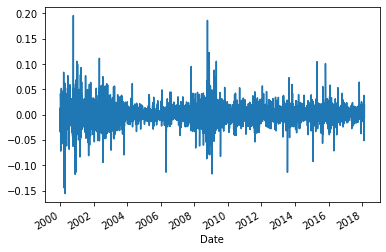

In [2]:
# Returns
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/0f1a004a8aa693163fa55f277513309f710b700d/MSFTPrices.csv', 
                 parse_dates=['Date'])
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)
df['Return'] = df['Adjusted'].pct_change()
df['Return'].plot() # plot returns over time
plt.show()

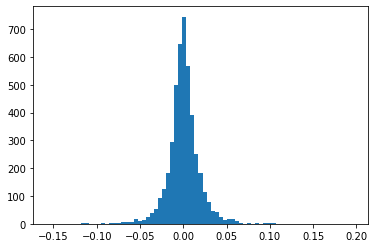

In [3]:
# Visualize return distributions
plt.hist(df['Return'].dropna(), bins=75, density=False) # density=True: probability density plot
plt.show()

In [4]:
# Average annualized return
mean_rtn_daily = np.mean(df['Return'])
annualized_rtn = ((1+mean_rtn_daily)**252)-1
annualized_rtn

0.09985839482852632

In [5]:
# Volatility and variance
sigma = np.std(df['Return'])
var = sigma**2
sigma_annualized = sigma*np.sqrt(252)
var_annualized = sigma_annualized**2
print(f"""vol:{sigma}\nvar:{var}\nannualized vol: {sigma_annualized}\nannualized variance: {var_annualized}""")

vol:0.019341100408708317
var:0.00037407816501973704
annualized vol: 0.3070304505826315
annualized variance: 0.09426769758497373


In [6]:
# Skewness
skew(df['Return'].dropna())

0.21935459193067805

In [7]:
# Kurtosis
excess_kurtosis = kurtosis(df['Return'].dropna()) # the kurtosis function actually returns excess kutosis
kurtosis = excess_kurtosis+3
print(f"Fourth moment of the returns distribution: {kurtosis}")

Fourth moment of the returns distribution: 13.314572618025519


In [8]:
# Statistical test for normality
p_value = stats.shapiro(df['Return'].dropna())[1]

if p_value<=0.05:
  print("Normality rejected")
else:
  print("Normality accepted")

Normality rejected


## 2. Portfolio composition and backtesting

Portfolio return:\
$R_p = R_{a_1}w_{a_1}+R_{a2}w_{a_2}+...+R_{a_n}w_{a_n}$
>$R_{a_n}$: return for asset n\
>$w_{a_n}$: weight for asset n

In [9]:
df_port = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv',
                            parse_dates=['Date'])
df_port = df_port.sort_values(by=['Date'])
df_port.set_index('Date', inplace=True)
df_port.head(2)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811


In [10]:
# Returns for assigned weighted portfolio
port_weights = np.array([0.20, 0.20, 0.05, 0.05, 0.20, 0.20, 0.02, 0.05, 0.03])
df_port['port_rtn'] = df_port.mul(port_weights, axis=1).sum(axis=1) # multiply an array and sum by days

In [11]:
# Returns for equally weighted portfolio
n_ticker = 5
port_weights_ew = np.repeat(1/n_ticker, n_ticker)
df_port['port_rtn_ew'] = df_port.iloc[:,:n_ticker].mul(port_weights_ew, axis=1).sum(axis=1)

Market-cap weighted portfolios:\
$w_{mcap_n}=\frac{mcap_n}{\sum_{i=1}^{n}mcap_i}$

In [12]:
# Returns for market-cap weighted portfolio
mkt_cap = np.array([601.51, 469.25, 349.5, 310.48, 299.77])
mcap_weights = mkt_cap/sum(mkt_cap)
df_port['port_rtn_mcap'] = df_port.iloc[:,:n_ticker].mul(mcap_weights,axis=1).sum(axis=1)
df_port.head(2)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,port_rtn,port_rtn_ew,port_rtn_mcap
Date,,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.006990,0.006654,0.006126
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000164,-0.003278,-0.003238


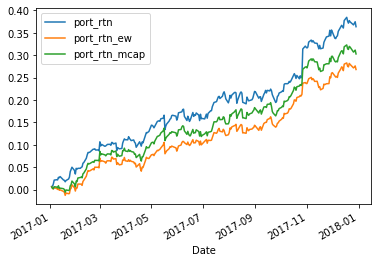

In [13]:
# Plot cumulative returns for portfolio
cum_rtn = ((1+df_port).cumprod()-1)
cum_rtn[['port_rtn', 'port_rtn_ew', 'port_rtn_mcap']].plot()

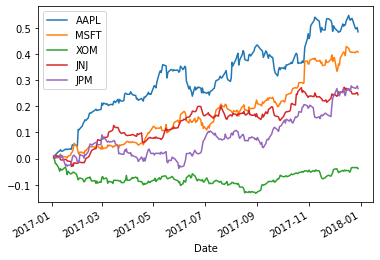

In [14]:
# Plot cumulative returns for single tickers
cum_rtn.iloc[:,:n_ticker].plot()

## 3. Correlation and co-variance

In [15]:
# Correlation matrix
corr_mat = df_port.iloc[:,:n_ticker].corr()
corr_mat

,AAPL,MSFT,XOM,JNJ,JPM
AAPL,1.000000,0.437430,0.055505,0.038432,0.199914
MSFT,0.437430,1.000000,0.084108,0.230215,0.191248
XOM,0.055505,0.084108,1.000000,0.121012,0.305926
JNJ,0.038432,0.230215,0.121012,1.000000,0.070328
JPM,0.199914,0.191248,0.305926,0.070328,1.000000


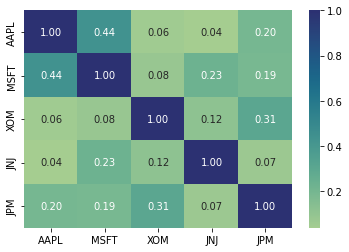

In [16]:
# Heatmap
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='crest')
plt.show()

In [17]:
# Co-variance matrix
cov_mat = df_port.iloc[:,:n_ticker].cov()
cov_mat

,AAPL,MSFT,XOM,JNJ,JPM
AAPL,0.000123,0.000045,0.000004,0.000003,0.000023
MSFT,0.000045,0.000087,0.000006,0.000015,0.000018
XOM,0.000004,0.000006,0.000050,0.000006,0.000022
JNJ,0.000003,0.000015,0.000006,0.000052,0.000005
JPM,0.000023,0.000018,0.000022,0.000005,0.000105


In [18]:
# Annualized co-variance matrix
cov_mat_annual = cov_mat*252
cov_mat_annual

,AAPL,MSFT,XOM,JNJ,JPM
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597
XOM,0.001093,0.001392,0.012500,0.001548,0.005554
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307
JPM,0.005716,0.004597,0.005554,0.001307,0.026371


### 3.1 Portfolio standard deviation

#### 3.1.1 Two asset portfolio
$\sigma_p=\sqrt{w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2 \rho_{1,2} \sigma_1 \sigma_2}$
>$\sigma_p$: portfolio standard deviation\
>$w$: asset weight\
>$\sigma$: asset volatility\
>$\rho_{1,2}$: correlation between assets 1 and 2

#### 3.1.2 Multi-asset portfolio
$\sigma_{Portfolio}=\sqrt{w_T \cdot \Sigma \cdot w}$
>$\sigma_{Portfolio}$: portfolio volatility\
>$\Sigma$: covariance matrix of returns\
>$w$: portfolio weights\
>$w_T$: transposed portfolio weights\
>$\cdot$: dot product operator:
$a\cdot b=\Sigma_{i=1}^{n}a_ib_i=a_1b_1+a_2b_2+...+a_nb_n$

In [19]:
port_vol = np.sqrt(np.dot(port_weights[:n_ticker].T, np.dot(cov_mat, port_weights[:n_ticker])))
port_vol

0.004568831703557459

### 3.2 Sharpe ratio
$S = \frac{R_a-r_f}{\sigma_a}$
>$R_a$: asset return\
>$r_f$: risk-free rate of return\
>$\sigma_a$: asset volatility

### 3.3 Markovitz portfolios

In [20]:
rfr = 0
df_port2 = pd.read_csv("https://assets.datacamp.com/production/repositories/1546/datasets/85e2663a50d3445cbc2c2d30ac81abbaae6a7f56/EfficientFrontierPortfoliosSlim.csv")
df_port2["Sharpe"] = (df_port2['Returns']-rfr)/df_port2['Volatility']
df_port2.head(2)

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility,Sharpe
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565,0.742884
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723,0.758601


In [21]:
# Maximum Sharpe Ratio (MSR) Returns portfolio
MSR_weights = np.array(df_port2.sort_values(by=['Sharpe'], ascending=False).iloc[0, :n_ticker])
MSR_weights

array([0.00755369, 0.00573255, 0.00724446, 0.16672379, 0.38235578])

In [22]:
# Global Minimum Volatility (GMV) Returns portfolio
GMV_weights = np.array(df_port2.sort_values(by=['Volatility'], ascending=True).iloc[0, :n_ticker])
GMV_weights

array([0.08658622, 0.01522472, 0.04522291, 0.34099938, 0.02868646])

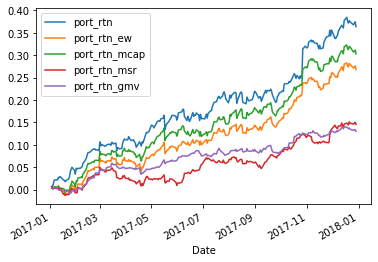

In [23]:
# Plot cumulative returns for portfolio
df_port['port_rtn_msr'] = df_port.iloc[:, :n_ticker].mul(MSR_weights, axis=1).sum(axis=1)
df_port['port_rtn_gmv'] = df_port.iloc[:, :n_ticker].mul(GMV_weights, axis=1).sum(axis=1)
cum_rtn = ((1+df_port).cumprod()-1)
cum_rtn[['port_rtn', 'port_rtn_ew', 'port_rtn_mcap', 'port_rtn_msr', 'port_rtn_gmv']].plot()

### Model 1: CAPM model
$E(R_P)-RF=\beta_P(E(R_M-RF))$
>$E(R_P)-RF$: the excess expected return of portfolio P\
>$E(R_M)-RF$: the excess expected return of the broad market portfolio B\
>$RF$: the regional risk-free rate\
>$\beta_P$: portfolio beta, or exposure, to the broad market portfolio B
>>$\beta_P=\frac{Cov(R_P,R_B)}{Var(R_B)}$
>>>$\beta_P$: portfolio beta\
>>>$Cov(R_P,R_B)$: co-variance between portfolio P and the benchmark index (B)\
>>>$Var(R_B)$: variance of the benchmark market index

Regression: \
$y = \beta X + \epsilon$

In [24]:
df_port3 = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/3d9b734fea954b629d2477ef48c36525dfecf6e0/FamaFrenchFactors.csv',
                       parse_dates=['Date'])
df_port3 = df_port3.sort_values(by=['Date'], ascending=True)
df_port3.set_index('Date', inplace=True)
df_port3.head()

,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


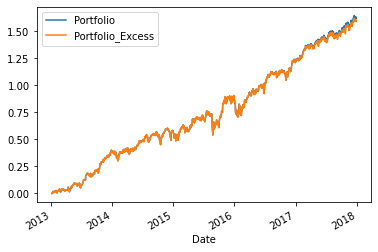

In [25]:
df_port3['Portfolio_Excess'] = df_port3['Portfolio']-df_port3['RF']

# Plot cumulative return vs cumulative excess return
cum_rtn = (1+df_port3[['Portfolio','Portfolio_Excess']]).cumprod()-1
cum_rtn.plot()
plt.show()

In [26]:
# Co-variance
covariance_matrix = df_port3[['Portfolio_Excess','Market_Excess']].cov()
covariance_coefficient = covariance_matrix.iloc[0,1]
benchmark_variance = df_port3['Market_Excess'].var()
portfolio_beta = covariance_coefficient/benchmark_variance
portfolio_beta

0.9737755165745455

In [27]:
covariance_matrix

,Portfolio_Excess,Market_Excess
Portfolio_Excess,0.000070,0.000057
Market_Excess,0.000057,0.000059


In [28]:
# Calculate beta with linear regression
import statsmodels.formula.api as smf

CAPM_model = smf.ols(formula='Portfolio_Excess~Market_Excess', data=df_port3)
CAPM_fit = CAPM_model.fit()
regression_beta = CAPM_fit.params['Market_Excess']

print(regression_beta)
print(CAPM_fit.rsquared) # R-squared
print(CAPM_fit.rsquared_adj) # adjusted R-squared: avoid overfitting


0.973775516574546
0.7944263892587435
0.7942627160017839


### Model 2: Fama-French 3 Factor Model
$R_P=RF+\beta_M(R_M-RF)+b_{SMB}\cdot SMB + b_{HML} \cdot HML + \alpha $
>$SMB$: small minus big factor\
>$b_{SMB}$: exposure to the SMB factor\
>$HML$: high minus low factor\
>$b_{HML}$: exposure to the HML factor\
>$\alpha$: performance which is unexplained by any other factors\
>$\beta_M$: beta to the braod market portfolio B

In [29]:
# Define a regression model that explains Portfolio_Excess as a function of Market_Excess, SMB, and HML
FamaFrench_model = smf.ols(formula='Portfolio_Excess~Market_Excess+SMB+HML', data=df_port3)
FamaFrench_fit = FamaFrench_model.fit()
FamaFrench_adj_r_squared = FamaFrench_fit.rsquared_adj
FamaFrench_adj_r_squared # higher than CAPM model

0.8193910088585152

In [30]:
# p-value of HML factor
pvalue_HML = FamaFrench_fit.pvalues['HML']
print(pvalue_HML)

# Test if p-value is statistically significant
print(pvalue_HML<0.05)

# Extract coefficients
print(FamaFrench_fit.params['HML'])
print(FamaFrench_fit.params['SMB'])

# Alpha and the efficient market hypothesis
portfolio_alpha = FamaFrench_fit.params['Intercept']
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized) # which is efficient

4.699308183443772e-07
True
-0.10865715035429256
-0.26215152743192643
0.04726181730280854


### Model 3: Fama-French 5 Factor Model

In [31]:
# Expanded 5 factor model
FamaFrench5_model = smf.ols(formula='Portfolio_Excess~Market_Excess+SMB+HML+RMW+CMA', data=df_port3)
FamaFrench5_fit = FamaFrench5_model.fit()
FamaFrench5_adj_r_squared = FamaFrench5_fit.rsquared_adj
FamaFrench5_adj_r_squared # higher adjusted R-squared

0.8367245019225793

In [32]:
# Alpha
portfolio5_alpha = FamaFrench5_fit.params['Intercept']
portfolio5_alpha_annualied = ((1+portfolio5_alpha)**252)-1
portfolio5_alpha_annualied

0.044902389879467375

## 4. Value at risk

### 4.1 Drawdown

$Drawdown=\frac{r_t}{RM}-1$
>$r_t$: cumulative return at time t\
>$RM$: running maximum


In [33]:
df_port4 = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/dfe9da08c986709d59943d1d5c0106537a8c608a/USO.csv',
                       parse_dates=['Date'])
df_port4 = df_port4.sort_values(by=['Date'])
df_port4.set_index('Date', inplace=True)
df_port4.columns = ['Return']
df_port4['cum_rtn'] = (1+df_port4).cumprod()-1
df_port4.head()

,Return,cum_rtn
Date,,
2007-01-03,-0.042636,-0.042636
2007-01-04,-0.040688,-0.081589
2007-01-05,0.009285,-0.073062
2007-01-08,-0.007109,-0.079651
2007-01-09,-0.004001,-0.083333


In [34]:
# Calculate drawdown
df_cum_rtn = pd.DataFrame(df_port4['cum_rtn'])
running_max = np.maximum.accumulate(df_cum_rtn) # calculate the running maximum
running_max[running_max<1] = 1 # ensure the value never drops below 1
drawdown = df_cum_rtn/running_max -1 # calculate the percentage drawdown
drawdown.columns = ['Drawdown']
drawdown.head(2)

,Drawdown
Date,
2007-01-03,-1.042636
2007-01-04,-1.081589


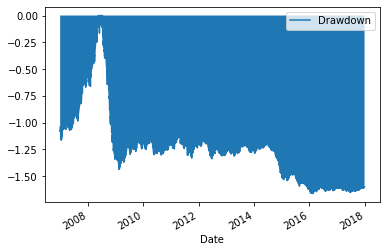

In [35]:
# Plot drawdown
drawdown.plot()
plt.fill_between(drawdown.index, drawdown['Drawdown'])
plt.show()

### 4.2 VaR & CVaR

In [36]:
# VaR(95)
var_level = 95
return_pct = df_port4['Return']*100
var_95 = np.percentile(return_pct, 100-var_level)
var_95 # 95% certain that losses will not exceed -3.61% in a given day based on historical values

-3.608233764037496

In [37]:
# CVaR(95): 
cvar_95 = (df_port4[return_pct<=var_95]['Return']*100).mean()
cvar_95 # in the worst 5% of cases, losses were on average exceed -5.05% historically

-5.054143158346777

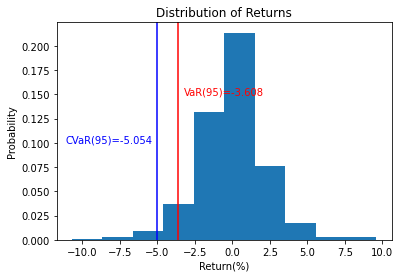

In [38]:
plt.hist(return_pct, density=True)

plt.axvline(var_95, color='r')
plt.text(var_95*0.9, 0.15, 'VaR(95)={:.3f}'.format(var_95), color='r')

plt.axvline(cvar_95, color='b')
plt.text(cvar_95*2.2, 0.1, 'CVaR(95)={:.3f}'.format(cvar_95), color='b')

plt.xlabel('Return(%)')
plt.ylabel('Probability')
plt.title('Distribution of Returns')
plt.grid(False)
plt.show()

In [39]:
# Parametric VaR(95)
mu = np.mean(df_port4['Return'])
vol = np.std(df_port4['Return'])
confidence_level = 0.05
parametric_var_95 = norm.ppf(confidence_level, mu, vol) # probability density function
print(f"Mean: {mu}\nVolatility: {vol}\nVaR(95): {parametric_var_95}")

Mean: -0.00028638956240214787
Volatility: 0.021888087129708852
VaR(95): -0.03628908906473361


$VaR(95)_{T\;days} = VaR(95)_{daily}\sqrt{T}$

In [40]:
# Scaling risk estimates
forecast_days = 5
parametric_var_95_5d = parametric_var_95*np.sqrt(forecast_days)
parametric_var_95_5d

-0.08114486999028862

### 4.3 Random walks

In [41]:
# One random simulation
T = 252
S0 = 10 # starting stock value
random_tests = np.random.normal(mu, vol, T) + 1
forecasted_values = S0*(random_tests.cumprod()) # simulate the stock value over 1 yr

-0.03655961671395404

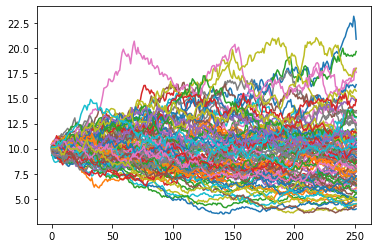

In [42]:
# Monte Carlo simulation
simulated_rtn = []

for i in range(100):
  random_rtn = np.random.normal(mu, vol, T)
  simulated_rtn.append(random_rtn)
  # Plot the Monte Carlo path
  forecasted_values = S0*((1+random_rtn).cumprod())
  plt.plot(range(T), forecasted_values)

var_95 = np.percentile(simulated_rtn, 5)
var_95